In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import datetime as dt
import seaborn as sns

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams.update({'font.size': 22})
plt.style.use('seaborn-poster')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Secondary_y


In [2]:
url = 'https://www.federalreserve.gov/econres/files/scf2019_tables_internal_real_historical.xlsx'

df_income = pd.read_excel(url, sheet_name=1, header=[2,3], index_col=0)
df_income.head(1)

Family characteristic    2001                                             \
                       Income Income.1 Percentage of families that saved   
NaN                    Median     Mean                               NaN   

Family characteristic                                2004           \
                      Percentage of      families  Income Income.1   
NaN                                           NaN  Median     Mean   

Family characteristic                                    \
                      Percentage of families that saved   
NaN                                                 NaN   

Family characteristic                                2007           ...  \
                      Percentage of      families  Income Income.1  ...   
NaN                                           NaN  Median     Mean  ...   

Family characteristic                          2019  \
                      Percentage of      families.9   
NaN                                             NaN   

Family characteristic                                 \
                      Percentage of      families.10   
NaN                                              NaN   

Family characteristic                                 \
                      Percentage of      families.11   
NaN                                              NaN   

Family characteristic                                 \
                      Percentage of      families.12   
NaN                                              NaN   

Family characteristic                                 \
                      Percentage of      families.13   
NaN                                              NaN   

Family characteristic                                 \
                      Percentage of      families.14   
NaN                                              NaN   

Family characteristic                                 \
                      Percentage of      families.15   
NaN                                              NaN   

Family characteristic                                 \
                      Percentage of      families.16   
NaN                                              NaN   

Family characteristic                                 \
                      Percentage of      families.17   
NaN                                              NaN   

Family characteristic                                 
                      Percentage of      families.18  
NaN                                              NaN  

[1 rows x 46 columns]

In [3]:
idx = pd.IndexSlice
mask = [#'Owner', 
        'Renter or other']

df_income_chart = df_income.loc[df_income.index.isin(mask),
    idx[:,['Income','Percentage of families that saved']
                 ]].transpose().reset_index().pivot(
    index='Family characteristic',columns='level_1',values='Renter or other')

df_income_chart.index.name='date'

df_income_chart.head(2)

level_1,Income,Percentage of families that saved
date,,
2001,35.6,43.6
2004,33.4,42.3


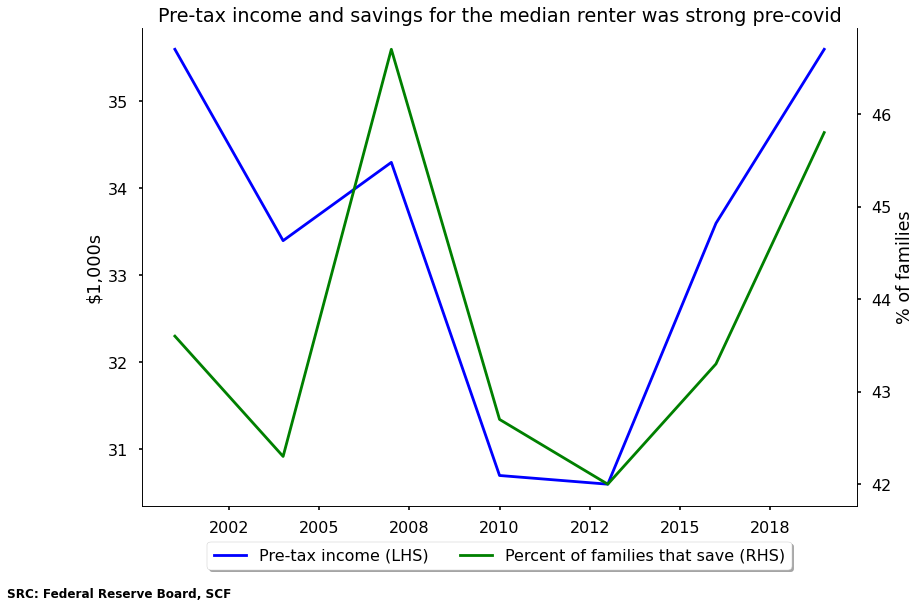

In [6]:
from matplotlib.ticker import FormatStrFormatter
mpl.rcParams['axes.spines.right'] = True


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
a, =  ax1.plot(df_income_chart['Income'].index, df_income_chart['Income'].values, color= 'blue', label= 'Pre-tax income (LHS)')

ax1.set_ylabel('$1,000s')

b, = ax2.plot(df_income_chart['Percentage of families that saved'].index, df_income_chart['Percentage of families that saved'].values, color= 'green', label= 'Percent of families that save (RHS)')
ax2.set_ylabel('% of families')


p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p],
          bbox_to_anchor=[0.5, -.15],
           loc='lower center', 
           ncol=5, 
           shadow=True)
plt.title('Pre-tax income and savings for the median renter was strong pre-covid')
txt="SRC: Federal Reserve Board, SCF"
plt.figtext(.1, -.02, txt, fontweight='bold', wrap=True, horizontalalignment='center', fontsize=12)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.grid(False)


